In [1]:
import torch
import h5py
import numpy as np

In [2]:
data = h5py.File('./MNISTdata.hdf5','r')


In [3]:
X,y = data['input'][...],data['output'][...]
def one_hot_encoded(y):
    a=[]
    for i in y:
        a.append(int(i[0]))
    return np.array(a)
y = one_hot_encoded(y)

In [4]:
ut = torch.Tensor(y)
ut.shape

torch.Size([2000])

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("Size of input training data is "+ str(len(X_train)))
print("Size of input training labels is "+ str(len(y_train)))
print("Size of input testing set is "+ str(len(X_test)))
print("Size of input test labels is "+ str(len(y_test)))


Size of input training data is 1400
Size of input training labels is 1400
Size of input testing set is 600
Size of input test labels is 600


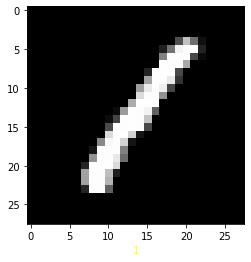

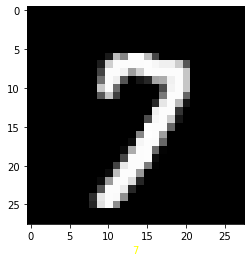

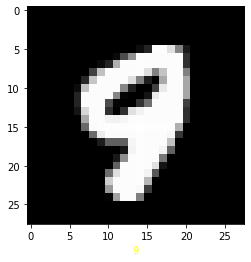

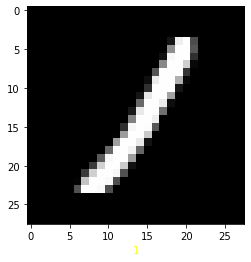

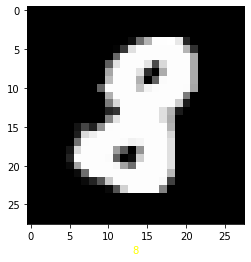

In [6]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(5):
    label = ""+str(y_test[i])
    plt.imshow(X_test[i], interpolation='nearest',cmap = 'gray')
    plt.xlabel(label,color='yellow')
    plt.show()
    
    
    


In [7]:
print("shape of train data before flattening" , X_train[0].shape)
print("shape of test data before flattening", X_test[0].shape)

def flatten(X):
    a = []
    for i in X:
        i = i.flatten()
        a.append(i)
    return np.array(a)
X_train = flatten(X_train)
X_test  = flatten(X_test)
print("shape of train data after flattening",(X_train[0].shape))
print("shape of test data after flattening",(X_test[0].shape))


shape of train data before flattening (28, 28, 1)
shape of test data before flattening (28, 28, 1)
shape of train data after flattening (784,)
shape of test data after flattening (784,)


In [8]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train),torch.tensor(y_train,dtype=torch.long))
test_dataset  = TensorDataset(torch.tensor(X_test),torch.tensor(y_test,dtype=torch.long))
train_dataloader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=64,shuffle=True)


In [14]:
import model4
m1 = model4.Model()
m1.print_model_congiurations()

TypeError: __init__() missing 3 required positional arguments: 'lr', 'wd', and 'epoch'

In [10]:
import model2

In [11]:
m = model2.Model(0.0001,10**-3,200)
m.compute(train_dataloader,test_dataloader)
m.test(test_dataloader)
# m.print_model_congiurations()

epoch: 1/200,train_loss = 50.0053, test_loss = 22.2013 , train_acc = 19.79,test_acc = 44.00
epoch: 2/200,train_loss = 47.9224, test_loss = 21.4292 , train_acc = 50.64,test_acc = 51.83
epoch: 3/200,train_loss = 46.0607, test_loss = 20.5614 , train_acc = 61.71,test_acc = 59.83
epoch: 4/200,train_loss = 44.0135, test_loss = 19.6924 , train_acc = 65.64,test_acc = 61.83
epoch: 5/200,train_loss = 41.8543, test_loss = 18.7233 , train_acc = 69.43,test_acc = 67.33
epoch: 6/200,train_loss = 39.6304, test_loss = 17.7707 , train_acc = 71.71,test_acc = 69.67
epoch: 7/200,train_loss = 37.3723, test_loss = 16.8275 , train_acc = 75.21,test_acc = 70.83
epoch: 8/200,train_loss = 35.1503, test_loss = 16.0236 , train_acc = 78.14,test_acc = 74.17
epoch: 9/200,train_loss = 33.0279, test_loss = 14.9723 , train_acc = 79.64,test_acc = 75.00
epoch: 10/200,train_loss = 31.0013, test_loss = 14.2165 , train_acc = 83.14,test_acc = 77.50
epoch: 11/200,train_loss = 29.0722, test_loss = 13.4550 , train_acc = 85.50,tes

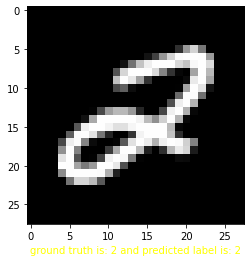

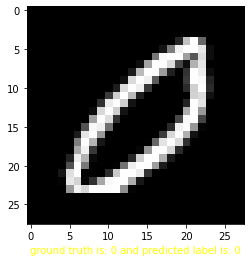

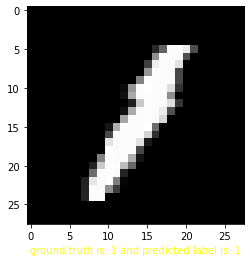

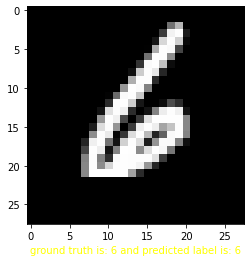

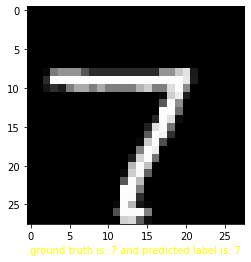

In [12]:
m.print_first_five_preds(test_dataloader)

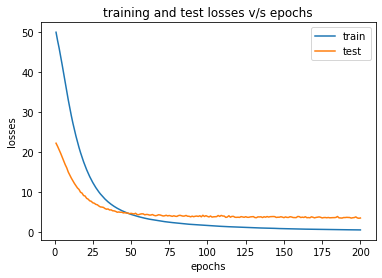

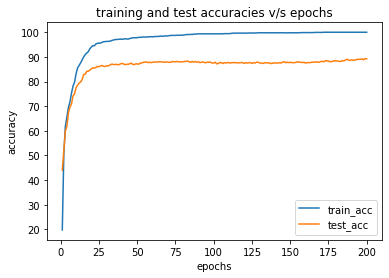

In [13]:
m.draw_graphs()